<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/ConWayLifeTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conway's Game Of Life on TensorFlow

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

import tensorflow as tf

#import cProfile

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [0]:
tf.executing_eagerly()

True

In [0]:
floor_size = 10
floor_shape = (floor_size,floor_size)
# for reproducability resuse seed
seed = (1000) 
random_floor = tf.round((tf.random.uniform(floor_shape,dtype=tf.float32, seed=seed, name='random_floor')))

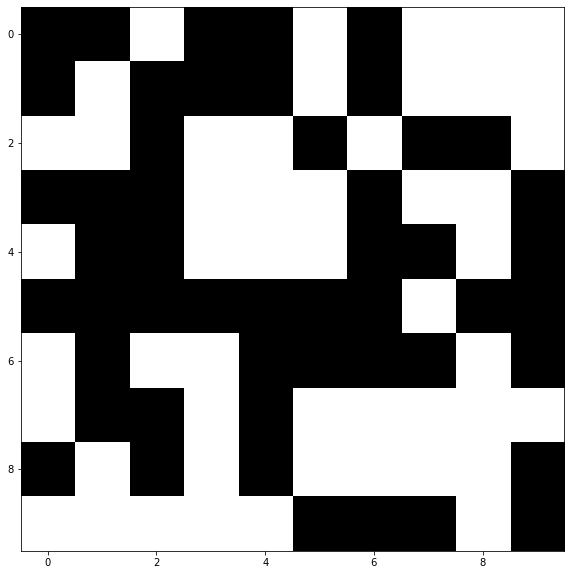

In [0]:
plt.gcf().set_size_inches(10,10)
figure_1 = plt.imshow(tf.slice(random_floor,(0,0),(10,10)),cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
alive_total = tf.reduce_sum(random_floor)
ratio_alive = tf.divide(alive_total,floor_shape[0]*floor_shape[1])
print("alive_total",int(alive_total))
print("alive_percent",float(ratio_alive*100))


alive_total 50
alive_percent 50.0


In [0]:
livable_filter = tf.constant([
                                [1,1,1],
                                [1,10,1],
                                [1,1,1]
                                ],dtype=tf.float32,name='neighbors_filter')
kernal = tf.reshape(livable_filter, [3, 3, 1, 1], name='kernel')
image = tf.reshape(random_floor, [1, floor_size, floor_size, 1], name='image')
livable_convolution = tf.reshape(tf.nn.conv2d(image,kernal,[1,1,1,1],"SAME"),[10,10])

In [0]:
tf.print(livable_convolution,summarize=-1)

[[12 13 4 14 13 4 11 2 0 0]
 [12 5 14 15 14 5 13 4 2 1]
 [3 6 14 5 3 13 4 13 12 2]
 [12 15 14 3 1 3 14 5 5 12]
 [5 17 16 5 3 5 14 14 5 13]
 [13 15 15 14 14 16 16 6 15 13]
 [4 15 6 6 15 16 14 13 4 12]
 [3 14 13 5 13 5 3 2 3 2]
 [11 4 12 4 12 4 3 2 3 11]
 [1 2 1 2 2 12 12 11 3 11]]


In [0]:
stage1 = tf.where(livable_convolution == 3,13,livable_convolution)
#tf.print(stage1,summarize=-1)
stage2 = tf.where(livable_convolution == 12,13,livable_convolution)
#tf.print(stage2,summarize=-1)
stage3 = tf.where(livable_convolution != 13,0,1)
tf.print(stage3,summarize=-1)


[[0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


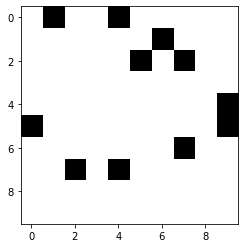

In [0]:
figure_2 = plt.imshow(tf.slice(stage3,(0,0),(10,10)),cmap='Greys',origin='upper',interpolation='nearest')

Credits
 - https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
 - https://nostarch.com/download/samples/PythonPlayground_sampleCh3.pdf
 - https://databricks.com/tensorflow/custom-functions
 - http://drsfenner.org/blog/2015/07/game-of-life-in-numpy-preliminaries-2/